In [125]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

# Lab 3.02 - Statistical hypothesis testing

## Exercise 1 - Binding recommendation on continuation of studies 

It is being said that introducing a “binding recommendation on continuation of studies” (refusing enrollment in the next academic year if a student did not complete a certain level of credits, NL: "bindend studie-advies, BSA") has a positive effect on the study efficiency and success rate. Before the introduction of binding recommendations, the number of completed credits per student per year was 44 with a standard deviation of 6.2. After the introduction, a sample of 72 random students has an average number of completed credits of 46.2.

1. Test whether there is evidence that the introduction of binding recommendations has improved the success rate among students. Calculate the critical value for a significance level of $\alpha = 2.5\%$.
2. Do the same by calculating the $p$-value.
3. Interpret the meaning of $\alpha$ being 2.5%.

In [126]:
mean_h0 = 44
sigma_h0 = 6.2

mean_sample = 46.2
sample_size = 72

alpha = 1-0.025

s = sigma_h0/np.sqrt(sample_size)

g1 = stats.norm.isf(1-alpha, loc = mean_h0, scale = sigma_h0 / np.sqrt(sample_size))


print("g= %.3f" % (g1))
if (g1 > mean_sample ):
    print("Sample mean = %.3f is lower than g: do not reject H0" % mean_sample)
else:
    print("Sample mean = %.3f is higher than g: reject H0" % mean_sample)

g= 45.432
Sample mean = 46.200 is higher than g: reject H0


In [127]:
mean_h0 = 44
sigma_h0 = 6.2

mean_sample = 46.2
sample_size = 72

alpha = 0.025

s = sigma_h0/np.sqrt(sample_size)

p = stats.norm.sf(mean_sample, loc=mean_h0, scale= s)


print("p = %.5f \t a = %.4f" % (p,alpha))
if (p<alpha ):
    print("p > a : do not reject H0")
else:
    print("p < a : reject H0" )

p = 0.00130 	 a = 0.0250
p > a : do not reject H0



### Answers

1. $g \approx 45.4 < x = 46.2$.

    $x$ is inside the critical region, so we can reject the null hypothesis. Therefore, we can assume that binding recommendation on continuation of studies does increase the success rate.

2. $P(M > 46.2) \approx 0.0013 < \alpha = 0.025$. The probability value is smaller than the significance level, so we can reject the null hypothesis.
3. $\alpha$ represents the probability of rejecting a true null hypothesis $H_0$. In other words, there is a 2.5% chance that you wrongly conclude that the success rate has increased.


## Exercise 2 - Car dealers

One of the motives for choosing a car dealership is the resale value of the previous car, or more specifically the price a dealer wants to pay for the old car when the customer buys a new one. The importer of Ford wants that all dealers implement the same price policy.

The importer is of the opinion that the average price difference between the closest Ford dealer and the dealer where the old car was purchased should be at most €300. It is assumed that, if the difference is larger, potential customers will be more inclined to stay with their previous
dealer.

In a random sample, the following price differences are recorded:

```
[400, 350, 400, 500, 300, 350, 200,
 500, 200, 250, 250, 500, 350, 100]
```

Test whether there is reason to assume that the average price difference in reality is significantly greater than €300, using a significance level of 5%.

In [128]:
# gegeven
sample = [400, 350, 400, 500, 300, 350, 200, 500, 200, 250, 250, 500, 350, 100]
mean_h0 = 300
significance = 0.95


sample_data= pd.DataFrame(sample)
mean_sample = np.mean(sample_data)
sample_size= len(sample)
sigma_sample = np.std(sample_data, ddof=1)

print("mean of the samples = %.4f"% mean_sample)
print("sample size : %d"%sample_size)
print("standard deviation sample = %.4f"%sigma_sample)


# bereken
se=sigma_sample/np.sqrt(sample_size)
dgf = sample_size-1

# z-score onzekerheid
t_score_alpha = stats.t.isf((1-significance), dgf)

# speling adhv z-score en sigma
margin_of_error = t_score_alpha*se

print("g = %.4f" % (mean_h0+margin_of_error))

print("p = %.4f"%stats.t.sf(significance, df=dgf))



mean of the samples = 332.1429
sample size : 14
standard deviation sample = 123.4241
g = 358.4169
p = 0.1797


C:\Users\Andries\AppData\Local\Temp\ipykernel_7756\3522642309.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print("standard deviation sample = %.4f"%sigma_sample)
C:\Users\Andries\AppData\Local\Temp\ipykernel_7756\3522642309.py:27: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print("g = %.4f" % (mean_h0+margin_of_error))


### Answers

In this context ($n = 14 < 30$) the $z$-test cannot be used. Instead, we use Student’s $t$-test.

- $x \approx 332.143$
- $s \approx 123.424$
- $g \approx 358.42$. The sample mean is outside of the critical region, so we cannot reject $H_0$.
- $p \approx 0.1738$. $p \nless \alpha$ , so we cannot reject $H_0$. Based on this sample there is no reason to assume that the average price difference on the residual value of old cars is significantly higher than the amount recommended by the importer.

## Exercise 3 - rlanders.csv, revisited

The variable *Money* represents a gross annual salary (×100\\$). We assume this variable has a mean of $\mu = 500$ with standard deviation $\sigma = 98$. If we calculate the sample mean over the entire dataset (do this yourself!), it seems to support our assumptions. But what if we looked at
men and women separately (variable *Gender*)?

First, visualise this case by plotting a kernel density estimate of the variable *Money* over the entire dataset and split up according to *Gender*. Draw a vertical line for the assumed population mean and sample means.

Use an appropriate statistical test to verify the statements below, usinge a significance level of $\alpha = 5\%$. For each statement, calculate the critical value(s) and the $p$-value.

1. The average gross annual salary of men seems higher than the average. Is it also significantly higher?
2. The average gross annual salary of women seems lower. Is it significantly lower?
3. Calculate the region of acceptance for the average gross annual salary for the sample (men and women combined). In this case we want to verify if the sample mean is significantly different from the expected value, but it can be lower or higher.

### Answers

1. Sample mean: $\overline{x} \approx 507.535$, critical value: $g \approx 511.456$, $p \approx 0.1396$. We can **not** reject the null hypothesis. The gross annual income of men in this sample is not significantly higher than expected.
2. Sample mean: $\overline{x} \approx 472.058$, critical value: $g \approx 477.646$, $p \approx 0.0199$. We can reject the null hypothesis. The gross annual income of women in this sample is significantly lower than expected.
3. The acceptance region is the interval $[487.852, 512.148]$.

    Gender  Money  Days  Months  Count  Survey
ID                                            
1   Female    440    29      11     35       3
2   Female    503    23      10     52       3
3     Male    412    16      11     55       3
4     Male    587    25       9     28       5
5     Male    525    30      11     41       4


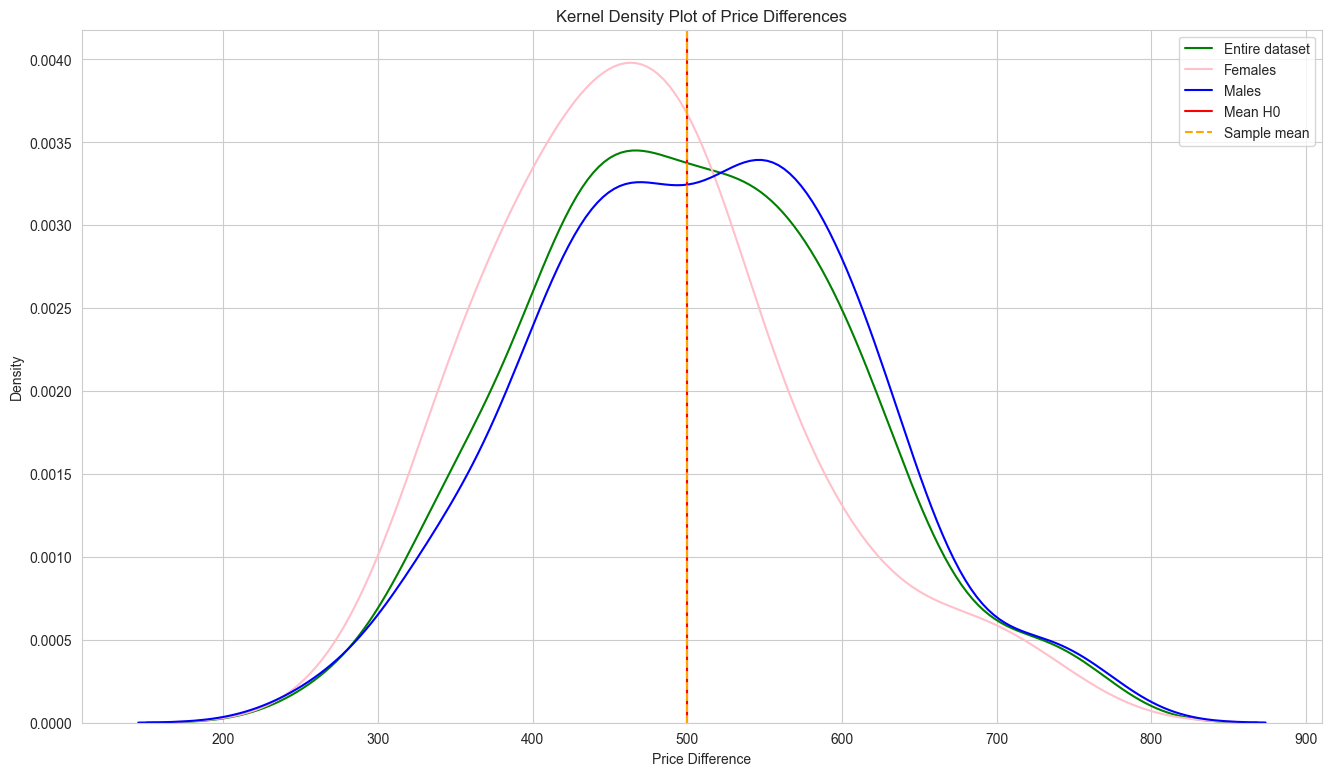

In [129]:
money = df = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-en-labs/main/data/rlanders.csv').set_index(['ID'])

# Gegeven
mean_h0 = 500
sigma_h0 = 98
significance = 0.95
alpha = 0.05

#Bereke
n=money.count()
sample_mean = money.Money.mean()

print(money.head())

money_females = money[money['Gender'] == 'Female']['Money']
money_men = money[money.Gender == 'Male'].Money

# Create a kernel density plot
plt.figure(figsize=(16, 9))  # Optional: Set the figure size
sns.set_style('whitegrid')  # Optional: Set the plot style
sns.kdeplot(money.Money,  color='green', label="Entire dataset")
sns.kdeplot(money_females,  color='pink', label="Females")
sns.kdeplot(money_men, color='blue', label="Males")

plt.axvline(mean_h0, color="red", label="Mean H0")
plt.axvline(sample_mean, color="orange",linestyle="dashed", label="Sample mean")

# Add labels and title
plt.xlabel('Price Difference')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Price Differences')

plt.legend()
plt.show()


sample_mean = 507.5354
p : 0.1396
p > a : do not reject H0
g : 511.4557
g > mean sample : do not reject H0


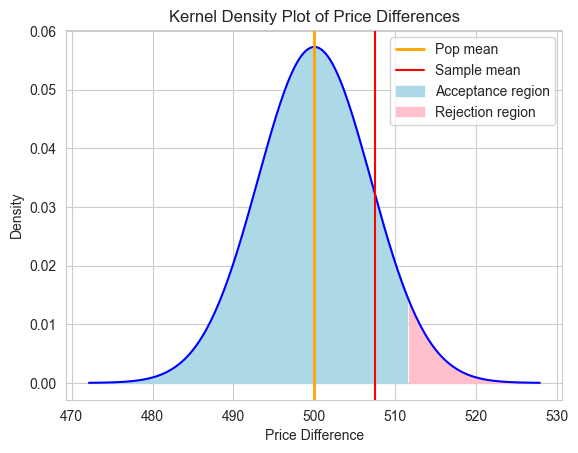

In [130]:


# Calculate
n = len(money_men)
alpha = 0.05
mean_sample = money_men.mean()

print("sample_mean = %.4f"%mean_sample)

# Calculate p-value
p = stats.norm.sf(money_men.mean(), loc=mean_h0, scale=sigma_h0/ np.sqrt(n))

print("p : %.4f" % p)
if p < alpha:
    print("p < a : reject H0")
else:
    print("p > a : do not reject H0")


# Calculate g
g = stats.norm.isf(alpha, loc=mean_h0, scale=sigma_h0 / np.sqrt(n))
print("g : %.4f" % g)
if g < mean_sample:
    print("g < mean sample : reject H0")
else:
    print("g > mean sample : do not reject H0")

# Gauss-curve
# X-values
dist_x = np.linspace(mean_h0 - 4 * sigma_h0 / np.sqrt(n), mean_h0 + 4 * sigma_h0 / np.sqrt(n), num=201)
# Y-values
dist_y = stats.norm.pdf(dist_x, loc=mean_h0, scale=sigma_h0 / np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y, color="blue")
# Hypothetical population mean in orange
dplot.axvline(mean_h0, color="orange", lw=2, label="Pop mean")
# Sample mean in red
dplot.axvline(mean_sample, color="red", label="Sample mean")
# Fill acceptance region
plt.fill_between(dist_x, 0, dist_y, where=(dist_x <= g), color='lightblue', label="Acceptance region")
# Fill rejection region
plt.fill_between(dist_x, 0, dist_y, where=(dist_x >= g), color='pink', label="Rejection region")
# Add labels and title
plt.xlabel('Price Difference')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Price Differences')

plt.legend()
plt.show()

sample_mean = 472.0577
p : 0.0199
p < a : reject H0
g : 477.6462
g > mean sample : reject H0


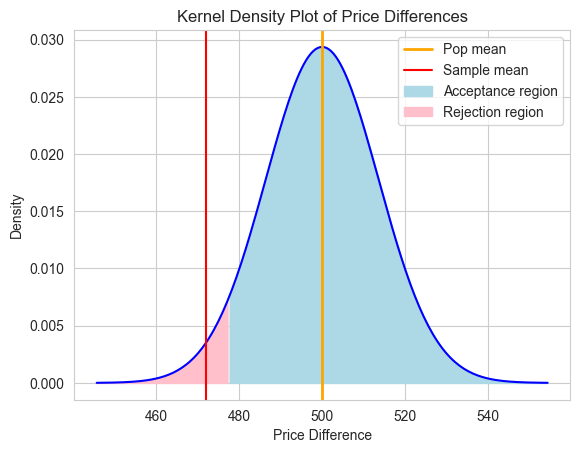

In [131]:
# Calculate
n = len(money_females)
alpha = 0.05
mean_sample = money_females.mean()

print("sample_mean = %.4f"%mean_sample)

# Calculate p-value
p = stats.norm.cdf(money_females.mean(), loc=mean_h0, scale=sigma_h0/ np.sqrt(n))

print("p : %.4f" % p)
if p < alpha:
    print("p < a : reject H0")
else:
    print("p > a : do not reject H0")


# Calculate g
g = stats.norm.isf(1-alpha, loc=mean_h0, scale=sigma_h0 / np.sqrt(n))
print("g : %.4f" % g)
if g > mean_sample:
    print("g > mean sample : reject H0")
else:
    print("g < mean sample : do not reject H0")

# Gauss-curve
# X-values
dist_x = np.linspace(mean_h0 - 4 * sigma_h0 / np.sqrt(n), mean_h0 + 4 * sigma_h0 / np.sqrt(n), num=201)
# Y-values
dist_y = stats.norm.pdf(dist_x, loc=mean_h0, scale=sigma_h0 / np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y, color="blue")
# Hypothetical population mean in orange
dplot.axvline(mean_h0, color="orange", lw=2, label="Pop mean")
# Sample mean in red
dplot.axvline(mean_sample, color="red", label="Sample mean")
# Fill acceptance region
plt.fill_between(dist_x, 0, dist_y, where=(dist_x >= g), color='lightblue', label="Acceptance region")
# Fill rejection region
plt.fill_between(dist_x, 0, dist_y, where=(dist_x <= g), color='pink', label="Rejection region")
# Add labels and title
plt.xlabel('Price Difference')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Price Differences')

plt.legend()
plt.show()

interval g : [487.8520 , 512.1480


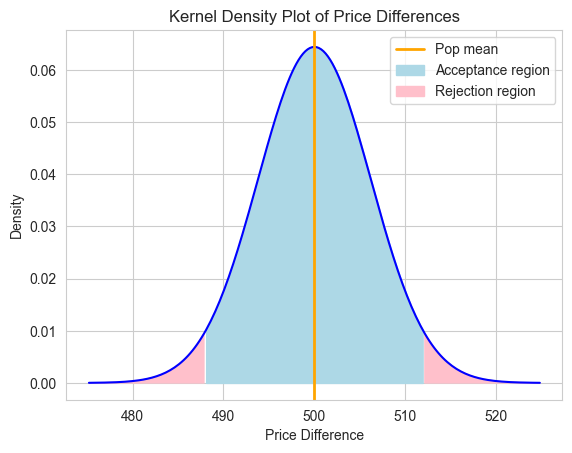

In [134]:
# Calculate
n = len(money)
alpha = 0.05



# Calculate g
g1 = stats.norm.isf(1-(alpha/2), loc=mean_h0, scale=sigma_h0 / np.sqrt(n))
g2 = stats.norm.isf((alpha/2), loc=mean_h0, scale=sigma_h0 / np.sqrt(n))
print("interval g : [%.4f , %.4f" % (g1,g2))


# Gauss-curve
# X-values
dist_x = np.linspace(mean_h0 - 4 * sigma_h0 / np.sqrt(n), mean_h0 + 4 * sigma_h0 / np.sqrt(n), num=201)
# Y-values
dist_y = stats.norm.pdf(dist_x, loc=mean_h0, scale=sigma_h0 / np.sqrt(n))
fig, dplot = plt.subplots(1, 1)
# Plot
dplot.plot(dist_x, dist_y, color="blue")
# Hypothetical population mean in orange
dplot.axvline(mean_h0, color="orange", lw=2, label="Pop mean")

# Fill acceptance region
plt.fill_between(dist_x, 0, dist_y, where=(dist_x >= g1) & (dist_x <= g2), color='lightblue', label="Acceptance region")
# Fill rejection region
plt.fill_between(dist_x, 0, dist_y, where=(dist_x <= g1) | (dist_x >= g2), color='pink', label="Rejection region")
# Add labels and title
plt.xlabel('Price Difference')
plt.ylabel('Density')
plt.title('Kernel Density Plot of Price Differences')

plt.legend()
plt.show()